
# Train Soccer Pitch Keypoint Detector



In [1]:
# make sure that we have access to GPU
!nvidia-smi

Sun Aug 25 13:02:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install dependencies

In [3]:
!pip install -q ultralytics roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.4/869.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 275.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.0 MB/s eta 0:00:00


## Imports

In [4]:
from roboflow import Roboflow
from google.colab import userdata
from IPython.display import Image

## Pull dataset

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

# download dataset from Roboflow
ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

project = rf.workspace("roboflow-jvuqo").project("football-field-detection-f07vi")
version = project.version(12)
dataset = version.download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.81, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to football-field-detection-12 in yolov8:: 100%|██████████| 564/564 [00:00<00:00, 2367.62it/s]


**NOTE:** Update `data.yaml` structure to align with the latest requirements of the `ultralytics` package.

In [6]:
# updating configuration files to point to new directories for training and validation

!sed -i 's|\(train: \).*|\1../train/images|' {dataset.location}/data.yaml
!sed -i 's|\(val: \).*|\1../valid/images|' {dataset.location}/data.yaml

## Custom training

In [7]:
%cd {HOME}

!yolo task=pose mode=train model=yolov8x-pose.pt data={dataset.location}/data.yaml batch=16 epochs=100 imgsz=640 mosaic=0.0 plots=True

/content
100% 133M/133M [00:00<00:00, 215MB/s]
Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=pose, mode=train, model=yolov8x-pose.pt, data=/content/datasets/football-field-detection-12/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=

In [8]:
!ls {HOME}/runs/pose/train/

args.yaml					   labels.jpg		train_batch1261.jpg
BoxF1_curve.png					   PoseF1_curve.png	train_batch1262.jpg
BoxP_curve.png					   PoseP_curve.png	train_batch1.jpg
BoxPR_curve.png					   PosePR_curve.png	train_batch2.jpg
BoxR_curve.png					   PoseR_curve.png	val_batch0_labels.jpg
confusion_matrix_normalized.png			   results.csv		val_batch0_pred.jpg
confusion_matrix.png				   results.png		weights
events.out.tfevents.1724591050.a17467c1e33f.913.0  train_batch0.jpg
labels_correlogram.jpg				   train_batch1260.jpg


/content


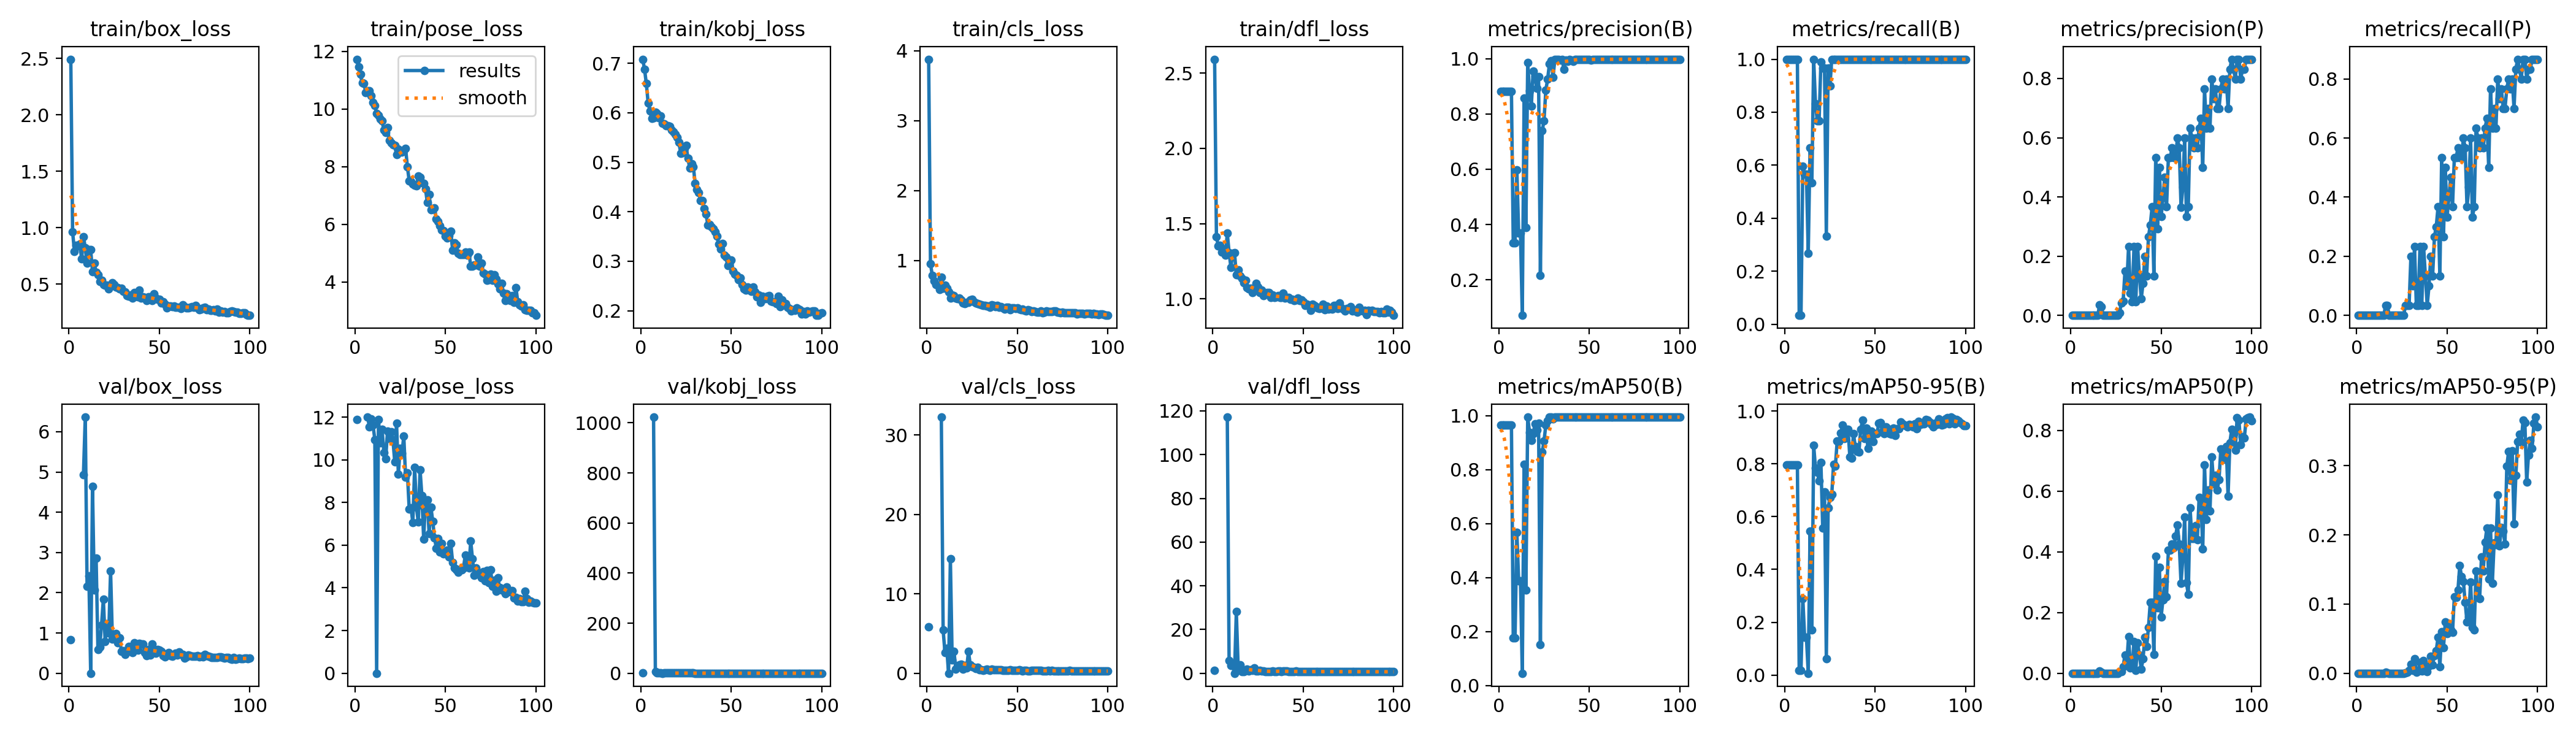

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/pose/train/results.png', width=600)

/content


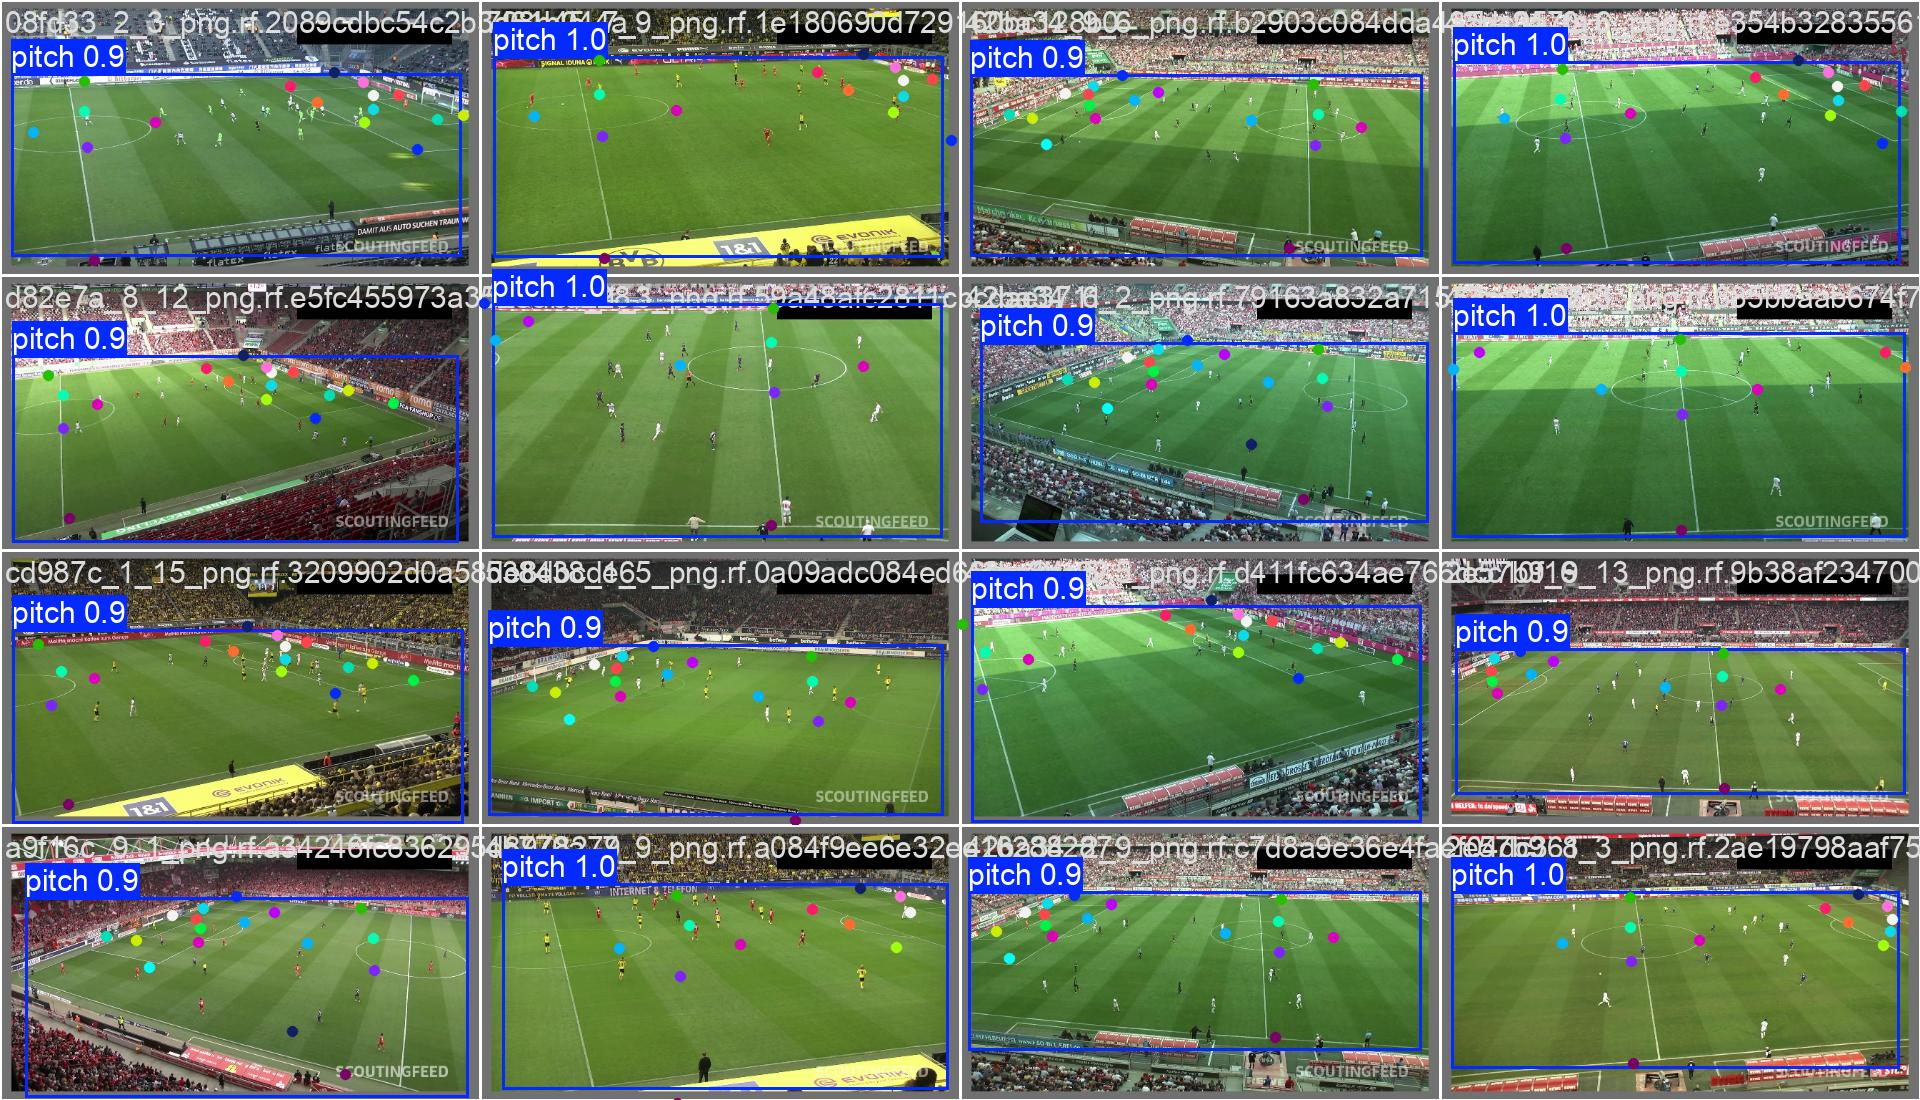

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/pose/train/val_batch0_pred.jpg', width=600)

## Validate custom model

In [11]:
%cd {HOME}

!yolo task=pose mode=val model={HOME}/runs/pose/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-pose summary (fused): 287 layers, 69,784,275 parameters, 0 gradients, 264.7 GFLOPs
val: Scanning /content/datasets/football-field-detection-12/valid/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100% 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.36s/it]
                   all         30         30      0.998          1      0.995      0.977      0.865      0.867      0.842      0.364
Speed: 0.2ms preprocess, 39.1ms inference, 0.0ms loss, 28.4ms postprocess per image
Results saved to runs/pose/val
💡 Learn more at https://docs.ultralytics.com/modes/val
